In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout , Flatten, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading and Preprocessing the image data

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
input_shape = (28,28,1)


In [3]:
#making sure the values are float
x_train = x_train.reshape(x_train.shape[0], 28,28,1)

x_test = x_test.reshape(x_test.shape[0], 28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [4]:
#normalizing the rgb codes by dividing it to the max RGB value
x_train = x_train/255
x_test = x_test/255
print("shape of Training : " , x_train.shape)

print("shape of Test : " , x_test.shape)

shape of Training :  (60000, 28, 28, 1)
shape of Test :  (10000, 28, 28, 1)


In [5]:
#Defining the models architecture
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation = "softmax"))

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │         946,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#training the model 
model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.8883 - loss: 0.3610
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9742 - loss: 0.0859
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9827 - loss: 0.0553
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9862 - loss: 0.0409
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9895 - loss: 0.0321
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9913 - loss: 0.0267
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9934 - loss: 0.0221
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9930 - loss: 0.0215
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9938 - loss: 0.0187
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9944 - loss: 0.0158


In [8]:
#estimating of the models performamnce

test_loss,test_acc = model.evaluate(x_test,y_test)
print("loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.0639
loss=0.055
Accuracy=0.984


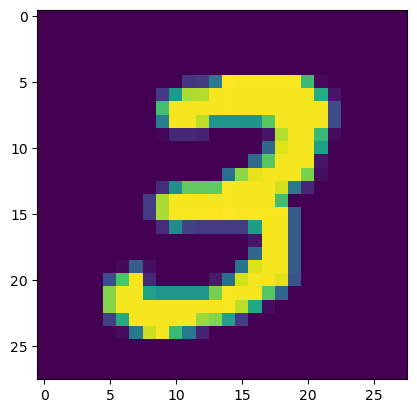

In [9]:
image = x_train[7]
plt.imshow(np.squeeze(image))
plt.show()

In [10]:
#predictinng the class of image
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model= model.predict([image])
print("predicted class: {}".format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
predicted class: 3
